In [1]:
library(urca)

In [2]:
data(EuStockMarkets)

In [3]:
Data <- EuStockMarkets

In [4]:
head(Data)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


In [5]:
tsData <- EuStockMarkets[,1]

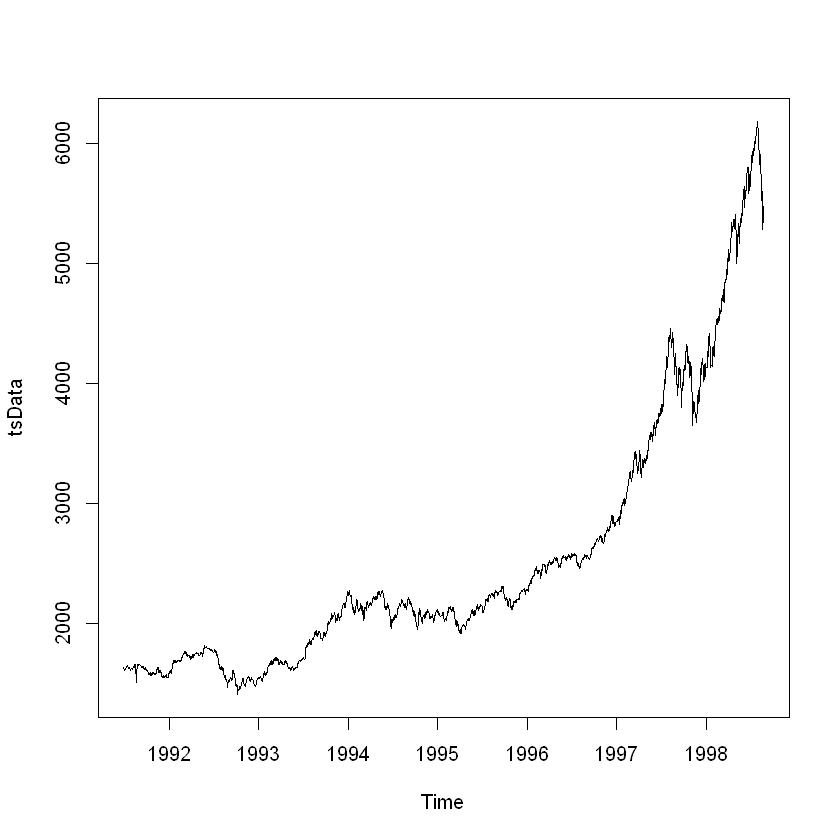

In [6]:
plot(tsData)

In [7]:
components.ts = decompose(tsData)

In [8]:
components.ts

$x
Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
   [1] 1628.75 1613.63 1606.51 1621.04 1618.16 1610.61 1630.75 1640.17 1635.47
  [10] 1645.89 1647.84 1638.35 1629.93 1621.49 1624.74 1627.63 1631.99 1621.18
  [19] 1613.42 1604.95 1605.75 1616.67 1619.29 1620.49 1619.67 1623.07 1613.98
  [28] 1631.87 1630.37 1633.47 1626.55 1650.43 1650.06 1654.11 1653.60 1501.82
  [37] 1524.28 1603.65 1622.49 1636.68 1652.10 1645.81 1650.36 1651.55 1649.88
  [46] 1653.52 1657.51 1649.55 1649.09 1646.41 1638.65 1625.80 1628.64 1632.22
  [55] 1633.65 1631.17 1635.80 1621.27 1624.70 1616.13 1618.12 1627.80 1625.79
  [64] 1614.80 1612.80 1605.47 1609.32 1607.48 1607.48 1604.89 1589.12 1582.27
  [73] 1567.99 1568.16 1569.71 1571.74 1585.41 1570.01 1561.89 1565.18 1570.34
  [82] 1577.00 1590.29 1572.72 1572.07 1579.19 1588.73 1586.01 1579.77 1572.58
  [91] 1568.09 1578.21 1573.94 1582.06 1610.18 1605.16 1623.84 1615.26 1627.08
 [100] 1626.97 1605.70 1589.70 1589.70 1603.26 1599.75 1

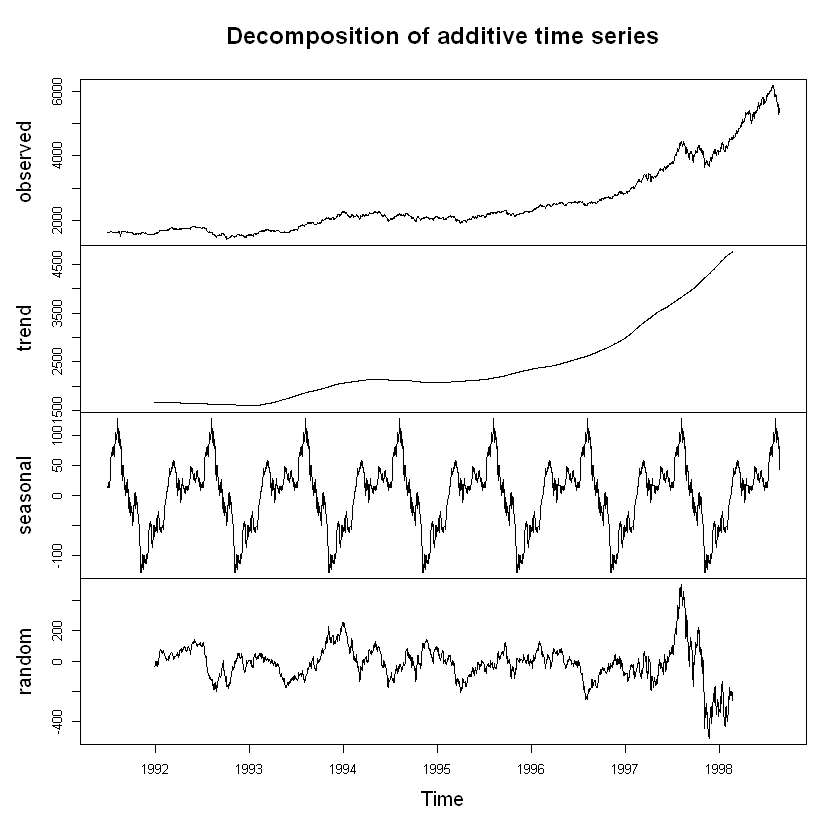

In [9]:
plot(components.ts)

In [10]:
kpss_test <-  ur.kpss(tsData, type = c("tau"), lags = c("short"), use.lag = NULL)

In [11]:
summary(kpss_test)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 8 lags. 

Value of test-statistic is: 3.6982 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


In [12]:
# series is non-stationary

In [13]:
tsstationary = diff(tsData, differences = 1)

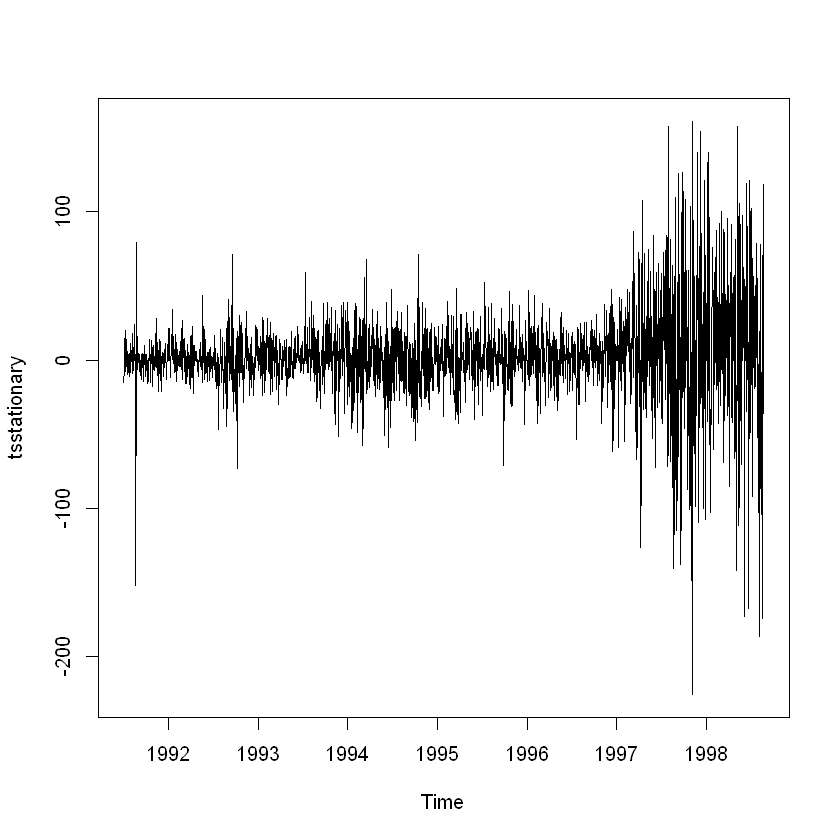

In [14]:
plot(tsstationary)

## Remove Seasonality

In [15]:
timeseriesseasonallyadjusted <- tsstationary -components.ts$seasonal

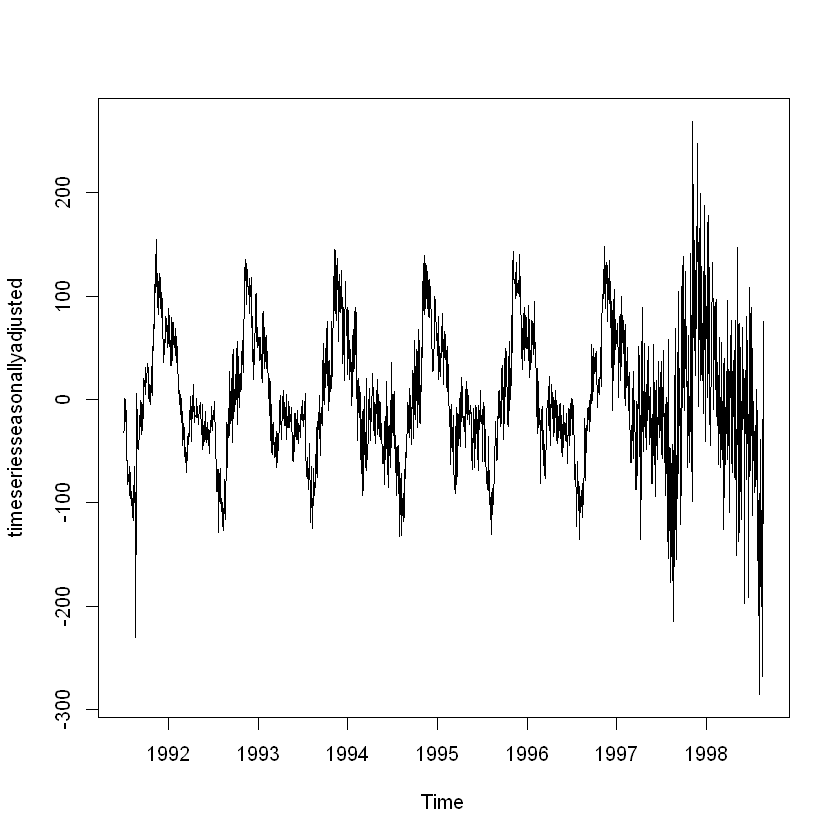

In [16]:
plot(timeseriesseasonallyadjusted)

In [17]:
tsstationary <- diff(timeseriesseasonallyadjusted, differences = 1)

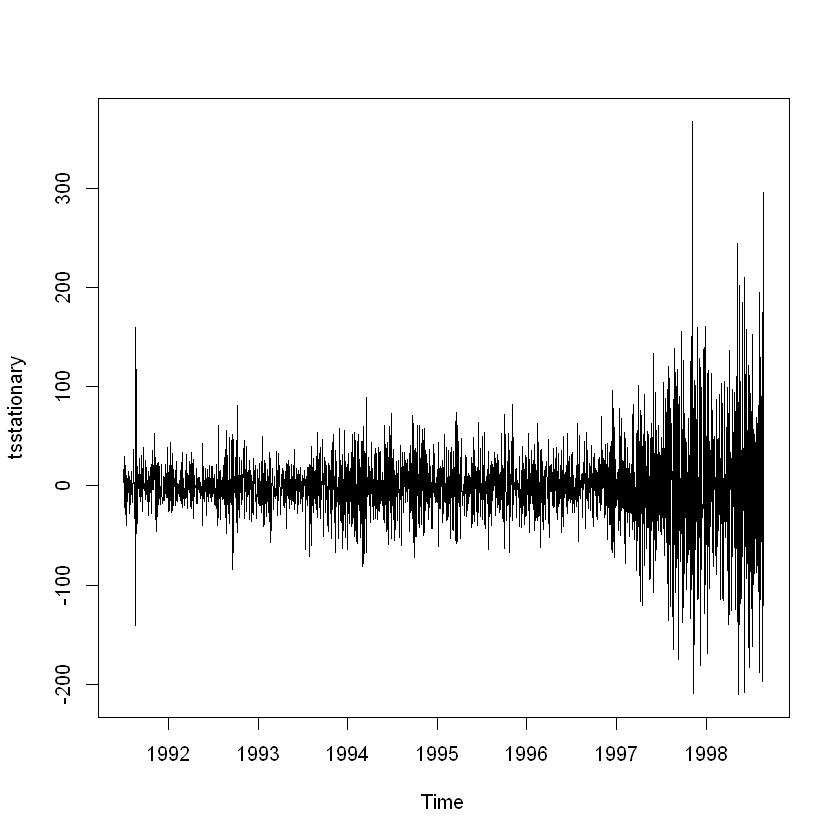

In [18]:
plot(tsstationary)

### Model Fit

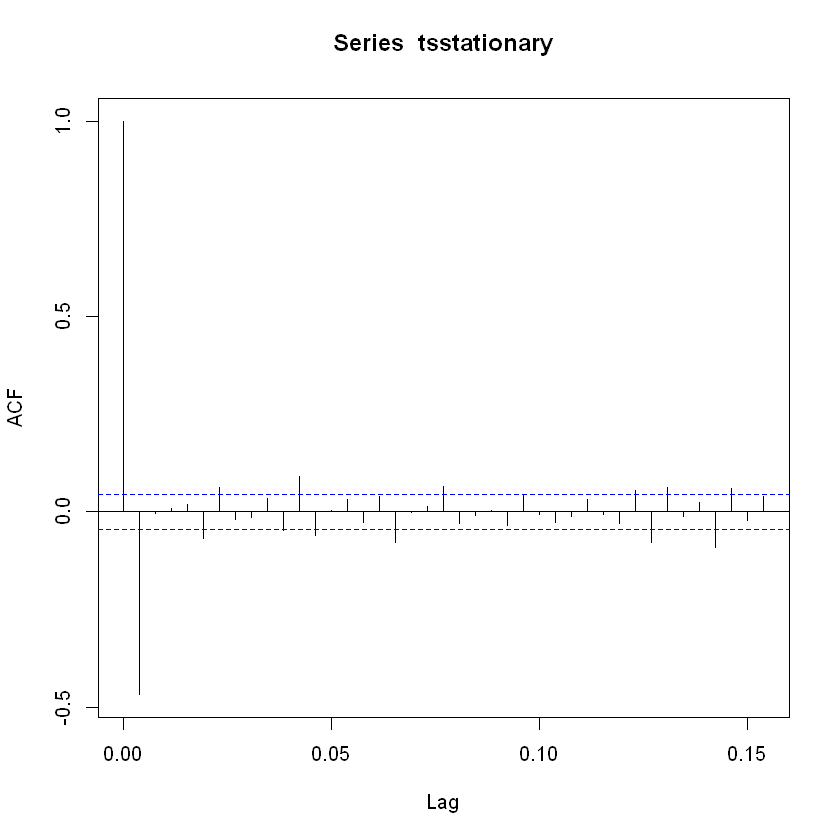

In [19]:
acf(tsstationary, lag.max = 40)

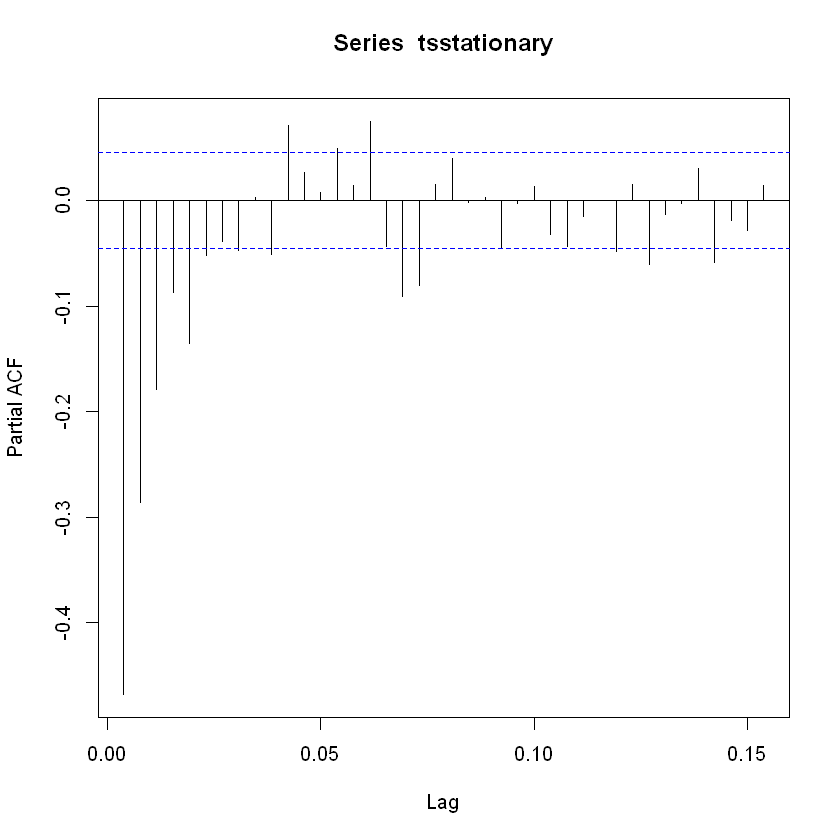

In [20]:
pacf(tsstationary, lag.max = 40)

In [29]:
fitARIMA  <- arima(tsData, order=c(1,1,1),
                 seasonal = list(order = c(1,0,0), period = 12),
                 method="ML")#Maximum Likelihood


In [26]:
res <- fitARIMA$residuals

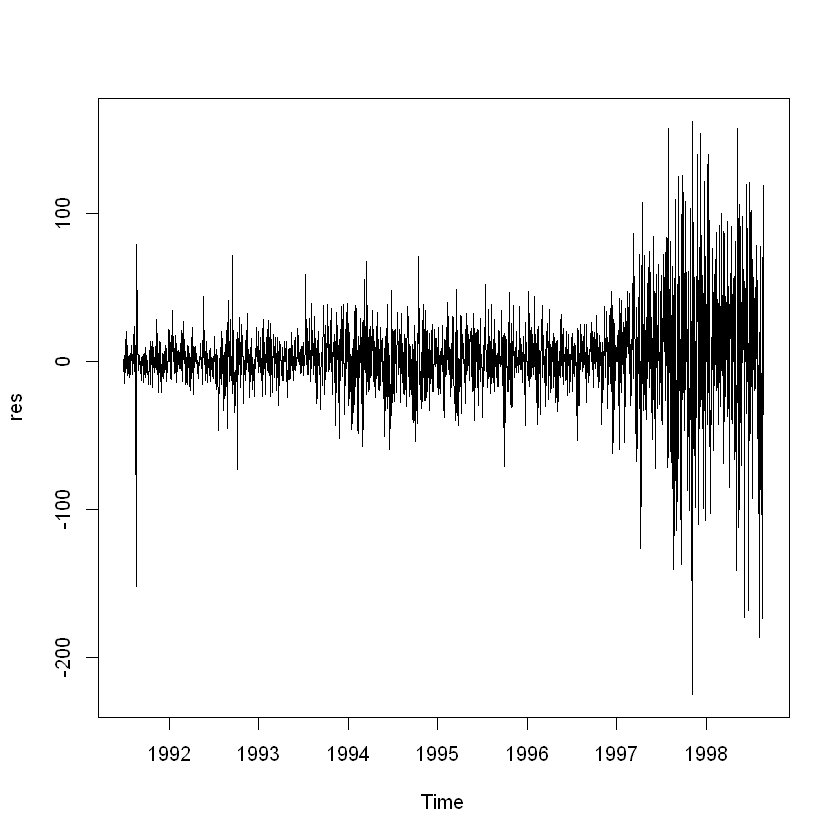

In [27]:
plot(res)

### Best Fit

In [25]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [28]:
model <- auto.arima(tsData, trace = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,2,2)(1,0,1)[260]                    : Inf
 ARIMA(0,2,0)                                : 19475.21
 ARIMA(1,2,0)(1,0,0)[260]                    : Inf
 ARIMA(0,2,1)(0,0,1)[260]                    : Inf
 ARIMA(0,2,0)(1,0,0)[260]                    : Inf
 ARIMA(0,2,0)(0,0,1)[260]                    : Inf
 ARIMA(0,2,0)(1,0,1)[260]                    : Inf
 ARIMA(1,2,0)                                : 18963.57
 ARIMA(1,2,0)(0,0,1)[260]                    : Inf
 ARIMA(1,2,0)(1,0,1)[260]                    : Inf
 ARIMA(2,2,0)                                : 18749.75
 ARIMA(2,2,0)(1,0,0)[260]                    : Inf
 ARIMA(2,2,0)(0,0,1)[260]                    : Inf
 ARIMA(2,2,0)(1,0,1)[260]                    : Inf
 ARIMA(3,2,0)                                : 18635.06
 ARIMA(3,2,0)(1,0,0)[260]                    : Inf
 ARIMA(3,2,0)(0,0,1)[260]                    : Inf
 ARIMA(3,2,0)(1,0,1)[260]                    : Inf
 

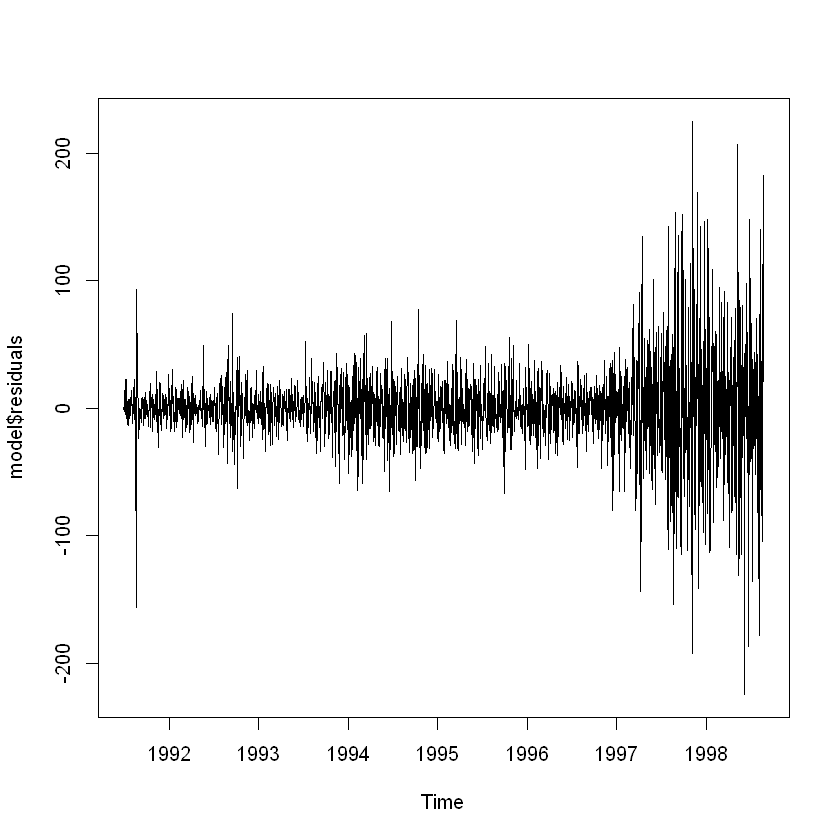

In [30]:
plot(model$residuals)

### Forecast

In [31]:
predicted_values <- forecast(model, h= 200, level = c(99.5))

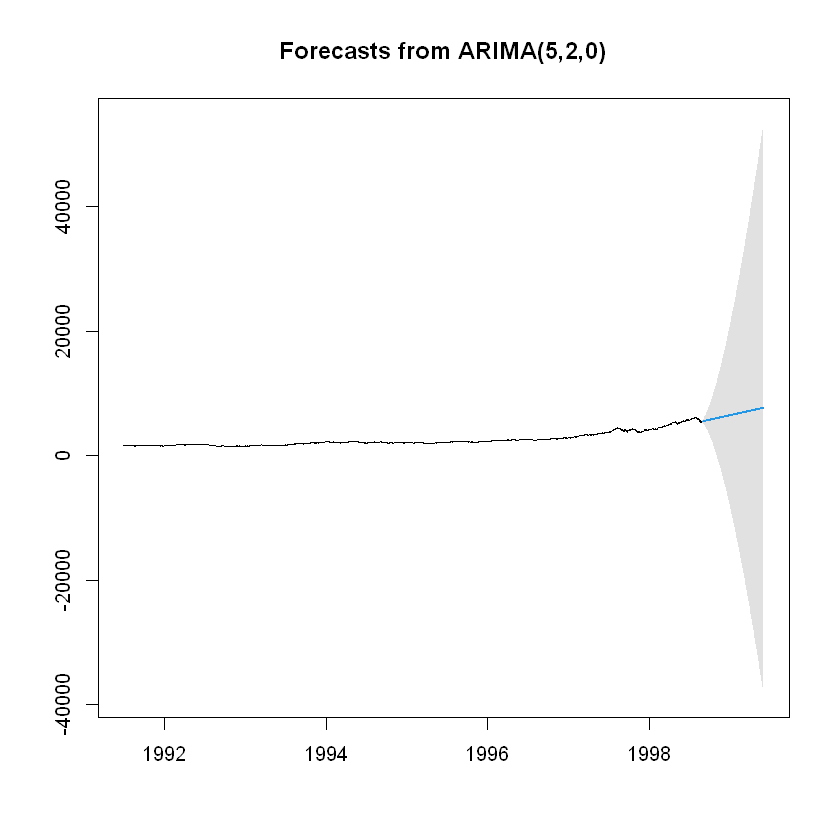

In [32]:
plot(predicted_values)